# Hierarchical Clustering of Twitter Followers By Friends

The idea of this notebook is to see how hierarchical clustering coould help in order to visualize different clusters in the data. For this purpose we'll use Datatons followers relations in twitter.

In [1]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
%matplotlib inline

## Load & Clean Data

Now, we are loading the data we've previously downloaded from Twitter. We have limited to the 100 Datatons followers with more friends (follow more people).

In [2]:
data = pickle.load( open( "fw_relations.p", "rb" ) )
df=pd.DataFrame(data)

In [3]:
df.head()

,follower,friend
0,DevelopNewMinds,CodeGinger
1,DevelopNewMinds,eletorro
2,DevelopNewMinds,oneeyedman
3,DevelopNewMinds,Roberto_Ranz
4,DevelopNewMinds,INCIBE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21275 entries, 0 to 21274
Data columns (total 2 columns):
follower    21275 non-null object
friend      21275 non-null object
dtypes: object(2)
memory usage: 332.5+ KB


## Transform Data for Clustering

The data is pivoted to encode them using One Hot Encoding

In [5]:
df['one']=1
df=df.pivot('follower','friend','one').fillna(0)

In [6]:
df.head()

friend,100t_digital,1_de_N,20m,24h_tve,4ntonio,500Startups,7wData,AELIT_Esp,AIZQM,AJGConsultores,...,y_uribe,yamila_moreno,yankovz,yembeo,yeswetech_,ygoex,yondemon,yosoytumadre_ti,zdepablo,zinniaqc
follower,,,,,,,,,,,,,,,,,,,,,
AdaLab_Digital,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
ArlixMeet_ES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
Aurora_Barrero,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Business_ready,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CSOspain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.describe()

friend,100t_digital,1_de_N,20m,24h_tve,4ntonio,500Startups,7wData,AELIT_Esp,AIZQM,AJGConsultores,...,y_uribe,yamila_moreno,yankovz,yembeo,yeswetech_,ygoex,yondemon,yosoytumadre_ti,zdepablo,zinniaqc
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.00000,100.000000,100.00,100.000000,100.000000,100.00,100.00000,100.00000,100.000000,100.000000
mean,0.040000,0.030000,0.180000,0.160000,0.100000,0.120000,0.140000,0.040000,0.020000,0.020000,...,0.08000,0.170000,0.01,0.100000,0.120000,0.01,0.15000,0.08000,0.020000,0.030000
std,0.196946,0.171447,0.386123,0.368453,0.301511,0.326599,0.348735,0.196946,0.140705,0.140705,...,0.27266,0.377525,0.10,0.301511,0.326599,0.10,0.35887,0.27266,0.140705,0.171447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.00,1.000000,1.000000,1.00,1.00000,1.00000,1.000000,1.000000


## Hierarchical Clustering

We are going to use scipy library to cluster the data and we'll see the clusters we obtain

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

In [9]:
link = linkage(df, method='complete')

In [10]:
set_link_color_palette(['g', 'm', 'y', 'k','r','c','b'])

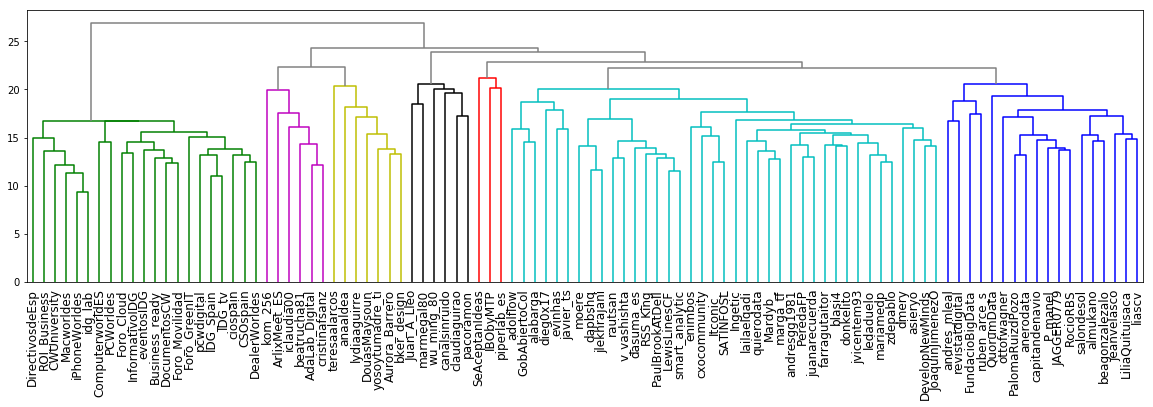

In [11]:
plt.figure(figsize=(20,5))
den = dendrogram(link, labels=df.index,
    leaf_font_size=12.,
    show_contracted=True, color_threshold=22, above_threshold_color="grey")

## Analizing Clusters

The first cluster on the left is very clear and distanced from the rest. If we analyze the accounts we can see that they are business organizations around BigData and Tech World.

In [12]:
from scipy.cluster.hierarchy import fcluster,distance

In [13]:
df['cluster']=fcluster(link, 0.8*distance.pdist(df).max(), 'distance')

In [14]:
def getClusterUnstack(clusterid):
    cluster=df[df.cluster==clusterid]
    del cluster['cluster']
    cluster=cluster.unstack(1).reset_index()
    cluster=cluster[cluster[0]>0]
    del cluster[0]
    return cluster

In [15]:
cluster1=getClusterUnstack(1)

In [16]:
cluster1.head()

,friend,follower
29,1_de_N,Foro_GreenIT
36,1_de_N,ROI_Business
84,4ntonio,Business_ready
90,4ntonio,DocumentosCW
91,4ntonio,Foro_Cloud


In [17]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 29 to 39141
Data columns (total 2 columns):
friend      5782 non-null object
follower    5782 non-null object
dtypes: object(2)
memory usage: 135.5+ KB


In [18]:
cluster1.friend.value_counts()[:20]

idgmillennials    21
SergioQueroIDG    21
dmaderow          21
GameProTV         21
smartlance        21
Managemanto       21
KYOCERA_DS_ES     21
Miguelpalomero    21
manuelpastor      21
MartinezChuan     21
mjmarzal          21
iWorldes          21
gigas             21
BVEx_ES           21
Baquia_com        21
jorgepizarro_     21
CIO_Directions    21
acasasIDG         21
idgtecne          21
Foro_Seguridad    21
Name: friend, dtype: int64

The other followers get around people and tech. If we analize them we could have more insight like cluster 3, we can see it's people around Google Campus, Tech & Women in Tech

In [19]:
cluster3=getClusterUnstack(3)

In [20]:
cluster3.head()

,friend,follower
18,20m,lydiaaguirre
19,20m,teresaalarcos
26,24h_tve,teresaalarcos
35,500Startups,Aurora_Barrero
36,500Startups,DouasMaysoun


In [21]:
cluster3.friend.value_counts()[:20]

womenalia          7
mike_arias         7
CampusMadrid       7
sofiabenjumea      7
Wayra              6
Emprende_Club      6
BBVAInnovation     6
adigital_org       6
ejoana             6
loogic             6
SoyGema            6
Yoriento           6
OpenFuture_        6
Spain_StartUp      6
gomezdelpozuelo    6
MujeresTech        6
south_summit       6
ManuelaCarmena     5
quierodata         5
yondemon           5
Name: friend, dtype: int64

All the top20 for cluster

In [22]:
pd.DataFrame({'cluster_green':getClusterUnstack(1).friend.value_counts()[:20].index.values,
              'cluster_magenta':getClusterUnstack(2).friend.value_counts()[:20].index.values,
              'cluster_yellow':getClusterUnstack(3).friend.value_counts()[:20].index.values,
              'cluster_black':getClusterUnstack(4).friend.value_counts()[:20].index.values,
              'cluster_red':getClusterUnstack(5).friend.value_counts()[:20].index.values,
              'cluster_cyan':getClusterUnstack(6).friend.value_counts()[:20].index.values,
              'cluster_blue':getClusterUnstack(7).friend.value_counts()[:20].index.values,              
             })

,cluster_black,cluster_blue,cluster_cyan,cluster_green,cluster_magenta,cluster_red,cluster_yellow
0,mapr,europapress,kaggle,idgmillennials,LqdSqd,SeniorManager,womenalia
1,CampusMadrid,todostartups,analyticbridge,SergioQueroIDG,HackathonLovers,JuanQuincoces,mike_arias
2,databeers,el_pais,databeers,dmaderow,oneeyedman,AranchaAsenjo,CampusMadrid
3,BBVAData,elmundoes,DataScienceCtrl,GameProTV,Rosario_Ort,librosdemivida,sofiabenjumea
4,Docker,iescolar,CampusMadrid,smartlance,carlosazaustre,KirkDBorne,Wayra
5,analyticbridge,BBVAInnovation,randal_olson,Managemanto,dyvelma,chemaalonso,Emprende_Club
6,rstudio,muyinteresante,odsc,KYOCERA_DS_ES,CamblorMarina,JoseMaGarciaSua,BBVAInnovation
7,randal_olson,EFEnoticias,KirkDBorne,Miguelpalomero,nabaroa,techreview_es,adigital_org
8,BigDataSpain,_anapastor_,kdnuggets,manuelpastor,uvedelacroix,RTouzaDavid,ejoana
9,simplystats,elconfidencial,hadleywickham,MartinezChuan,LRodriAce,Labestia3,loogic
